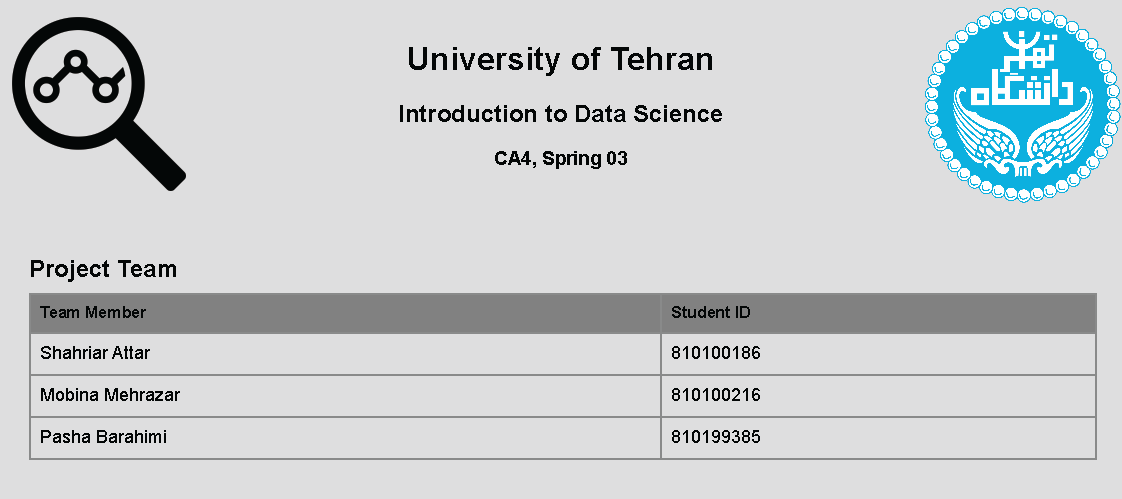


# Loss Functions

## Table of Contents

-   [Loss Functions](#loss-functions)
    -   [Introduction](#introduction)
    -   [Objectives](#objectives)
    -   [Tasks](#tasks)
    -   [Dataset Description](#dataset-description)
    -   [Environment Setup](#environment-setup)
    -   [Warm-Up](#warm-up)
        -   [Loading the Dataset](#loading-the-dataset)
        -   [Handling Missing Values](#handling-missing-values)
        -   [Feature Normalization](#feature-normalization)
        -   [Splitting the Dataset](#splitting-the-dataset)
    -   [Main Task](#main-task)
        -   [Part 1. Functions' Implementation](#part-1-functions-implementation)
            -   [Mean Squared Error (MSE)](#mean-squared-error-mse)
            -   [Mean Absolute Error (MAE)](#mean-absolute-error-mae)
            -   [Root Mean Squared Error (RMSE)](#root-mean-squared-error-rmse)
            -   [R² Score](#r²-score)
        -   [Part 2. Building and Training the Linear Regression Model](#part-2-building-and-training-the-linear-regression-model)
            -   [Linear Regression Model](#linear-regression-model)
            -   [Random Forest Regression Model](#random-forest-regression-model)
            -   [Neural Network Regression Model](#neural-network-regression-model)
        -   [Part 3. Model Evaluation](#part-3-model-evaluation)
            -   [Linear Regression Model](#linear-regression-model-1)
            -   [Random Forest Regression Model](#random-forest-regression-model-1)
            -   [Neural Network Regression Model](#neural-network-regression-model-1)
        -   [Part 4. Ordinary Least Squares](#part-4-ordinary-least-squares)
    -   [Questions](#questions)
    -   [References](#references)

## Introduction

In this assignment, we will explore various loss functions and apply gradient descent methods to optimize these functions. Our focus will be on the Diabetes dataset from the `scikit-learn` library, a well-regarded dataset in the machine learning community. This dataset consists of medical diagnostic measurements from numerous patients and is specifically designed to study diabetes progression.

## Objectives

The purpose of this assignment is as follows:

-   Using these data points to predict the quantitative measure of disease progression one year after baseline.
-   Practicing the application of regression analysis in a medical context.

## Tasks

Warm-Up:

1. Loading the Diabetes dataset from the `scikit-learn` library.
2. Handling missing values.
3. Normalizing the features.
4. Splitting the dataset.

Main Task:

5. Implementing the Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² Score functions.
6. Building and training a linear regression model using the Diabetes dataset.
7. Evaluating the model using the loss functions implemented in Task 5.
8. Implementing the Ordinary Least Squares method to estimate the coefficients of the linear regression model.

## Dataset Description

The diabetes dataset consists of 442 instances with the following ten baseline variables:

-   Age (age in years)
-   Sex
-   Body Mass Index (BMI)
-   Average Blood Pressure (BP)
-   Six blood serum measurements:
    -   s1: tc, total serum cholesterol
    -   s2: ldl, low-density lipoproteins
    -   s3: hdl, high-density lipoproteins
    -   s4: tch, total cholesterol / HDL
    -   s5: ltg, possibly log of serum triglycerides level
    -   s6: glu, blood sugar level

The target variable is a quantitative measure of disease progression one year after baseline.


## Environment Setup

Let's begin with setting up the Python environment and importing the necessary libraries.


In [1]:
from typing import Callable, Any
from tabulate import tabulate

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import tree

import statsmodels.api as sm

import seaborn as sns

import shap

In [2]:
shap.initjs()

In [3]:
TEST_SIZE = 0.05
RANDOM_STATE = 42

## Warm-Up

### Loading the Dataset

First, we'll load the diabetes dataset provided by [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) (scaled=False) or directly via [this link](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).


In [4]:
diabetes = load_diabetes(scaled=False)

#### Dataset Description


In [5]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Let's display the first ten rows of the dataset to understand its structure.


In [6]:
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data["target"] = diabetes.target
data.head(n=10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
5,23.0,1.0,22.6,89.0,139.0,64.8,61.0,2.00,4.1897,68.0,97.0
6,36.0,2.0,22.0,90.0,160.0,99.6,50.0,3.00,3.9512,82.0,138.0
7,66.0,2.0,26.2,114.0,255.0,185.0,56.0,4.55,4.2485,92.0,63.0
8,60.0,2.0,32.1,83.0,179.0,119.4,42.0,4.00,4.4773,94.0,110.0
9,29.0,1.0,30.0,85.0,180.0,93.4,43.0,4.00,5.3845,88.0,310.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


Also, we will print the data types of each feature to ensure they are numeric.


In [8]:
print(data.dtypes)

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


As we can see, all of the columns have a numeric data type.


### Handling Missing Values

Then, we should check for any missing values in the dataset and handle them appropriately (if missing values exist).


In [9]:
print(data.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


There is no missing data in the dataset, so we can proceed to the next step.


### Feature Normalization

After that, we will normalize the features to ensure all are on a similar scale.


In [10]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data.head(n=10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394,0.392523
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667,0.155763
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091,0.361371
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697,0.563863
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333,0.342679
5,0.066667,0.0,0.190083,0.380282,0.205882,0.115538,0.506494,0.000000,0.327003,0.151515,0.224299
6,0.283333,1.0,0.165289,0.394366,0.308824,0.288845,0.363636,0.141044,0.243287,0.363636,0.352025
7,0.783333,1.0,0.338843,0.732394,0.774510,0.714143,0.441558,0.359661,0.347643,0.515152,0.118380
8,0.683333,1.0,0.582645,0.295775,0.401961,0.387450,0.259740,0.282087,0.427955,0.545455,0.264798
9,0.166667,0.0,0.495868,0.323944,0.406863,0.257968,0.272727,0.282087,0.746393,0.454545,0.887850


### Splitting the Dataset

Finally, we'll split the data into training and testing sets using a standard ratio (e.g., 95% training, 5% testing). We'll utilize sklearn's train_test_split function or an equivalent method ensuring a random split.


In [11]:
x = data.drop("target", axis=1)
y = data["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
x_train_summary = shap.kmeans(x_train, 10)

Also, we will display the number of instances in both the training and the testing datasets to confirm the split.


In [12]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(419, 10) (23, 10) (419,) (23,)


As we can see, $\frac{419}{442} \approx 0.947$ and $\frac{23}{442} \approx 0.052$. Therefore, the split is approximately 95% training and 5% testing.


## Main Task

### Part 1. Functions' Implementation

We will implement the following functions from scratch:


#### Mean Squared Error (MSE)

The Mean Squared Error (MSE) is a common loss function used for regression problems. It is defined as the average of the squared differences between the predicted and actual target values. The formula for MSE is given by:

$$ MSE = \frac{1}{n} \sum\limits_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

where $n$ is the number of instances, $y_i$ is the actual target value, and $\hat{y}_i$ is the predicted target value.


In [13]:
def mse(y_true: np.array, y_pred: np.array) -> float:
    """
    Compute the mean squared error (MSE) between the true and predicted values.

    Parameters:
    - y_true: numpy array or list, true values
    - y_pred: numpy array or list, predicted values

    Returns:
    - mse: float, mean squared error

    Formula:
    - MSE = 1/n * sum((y_true - y_pred)^2)
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

#### Mean Absolute Error (MAE)

The Mean Absolute Error (MAE) is another loss function used for regression problems. It is defined as the average of the absolute differences between the predicted and actual target values. The formula for MAE is given by:

$$ MAE = \frac{1}{n} \sum\limits_{i=1}^{n} |y_i - \hat{y}_i| $$
where $n$ is the number of instances, $y_i$ is the actual target value, and $\hat{y}_i$ is the predicted target value.


In [14]:
def mae(y_true: np.array, y_pred: np.array) -> float:
    """
    Calculate the Mean Absolute Error (MAE) between the true and predicted values.

    Parameters:
    - y_true: list or numpy array of true values
    - y_pred: list or numpy array of predicted values

    Returns:
    - mae: float, the mean absolute error

    Formula:
    - MAE = 1/n * sum(abs(y_true - y_pred))
    """
    n = len(y_true)
    mae = np.sum(np.abs(y_true - y_pred)) / n
    return mae

#### Root Mean Squared Error (RMSE)

The Root Mean Squared Error (RMSE) is the square root of the MSE and is a popular evaluation metric for regression problems. The formula for RMSE is given by:

$$ RMSE = \sqrt{MSE} $$
where $MSE$ is the Mean Squared Error.


In [15]:
def rmse(y_true: np.array, y_pred: np.array) -> float:
    """
    Calculate the Root Mean Squared Error (RMSE) between the true and predicted values.

    Parameters:
    - y_true: numpy array or list, true values
    - y_pred: numpy array or list, predicted values

    Returns:
    - rmse: float, the RMSE value

    Formula:
    - RMSE = sqrt(1/n * sum((y_true - y_pred)^2))
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    squared_diff = (y_true - y_pred) ** 2

    mse = np.mean(squared_diff)

    rmse = np.sqrt(mse)

    return rmse

#### R² Score

The R² Score (coefficient of determination) is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by independent variables in a regression model. It is given by:

$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$
$$ SS_{res} = \sum\limits_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
$$ SS_{tot} = \sum\limits_{i=1}^{n} (y_i - \bar{y})^2 $$

where $SS_{res}$ is the sum of the squared residuals and $SS_{tot}$ is the total sum of squares, $n$ is the number of instances, $y_i$ is the actual target value, $\hat{y}_i$ is the predicted target value, and $\bar{y}$ is the mean of the actual target values.

The $R^2$ score ranges from 0 to 1, with 1 indicating a perfect fit.


In [16]:
def r2_score(y_true: np.array, y_pred: np.array) -> float:
    """
    Compute the R2 score between the true and predicted values.

    Parameters:
    - y_true: array-like, true values
    - y_pred: array-like, predicted values

    Returns:
    - r2: float, R2 score

    Formula:
    - R2 = 1 - (SS_residual / SS_total)
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    mean_true = np.mean(y_true)

    ss_total = np.sum((y_true - mean_true) ** 2)

    ss_residual = np.sum((y_true - y_pred) ** 2)

    r2 = 1 - (ss_residual / ss_total)

    return r2

### Part 2. Building and Training the Linear Regression Model

We should then construct a regression model and train it using the diabetes dataset.


In [17]:
class RegressionModel:
    def __init__(self, model, x_train_summary):
        self.model = model
        self.x_train_summary = x_train_summary
        self.y_true_test = None
        self.y_pred_test = None
        self.y_true_train = None
        self.y_pred_train = None

    def fit(self, x_train: np.array, y_train: np.array) -> None:
        self.model.fit(x_train, y_train)

    def predict(self, x_test: np.array) -> np.array:
        return self.model.predict(x_test)

    def getExplainer(self) -> Any:
        raise NotImplementedError

    def explain_single_output(self, x_test: np.array) -> None:
        explainer = self.getExplainer()

        shap_values = explainer.shap_values(x_test.iloc[0, :])
        plot = shap.force_plot(explainer.expected_value, shap_values, x_test.iloc[0, :])
        display(plot)

    def explain_all_output(self, x_test: np.array) -> None:
        explainer = self.getExplainer()

        shap_values = explainer.shap_values(x_test)
        shap.summary_plot(shap_values, x_test)
        shap.dependence_plot("bmi", shap_values, x_test)
        plot = shap.force_plot(explainer.expected_value, shap_values, x_test)
        display(plot)

    def plot_predictions(self, y_true: np.array, y_pred: np.array) -> None:
        plt.figure(figsize=(10, 6))
        plt.scatter(y_true, y_pred, c="red")
        plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], "--", c="blue")
        plt.xlabel("True Values")
        plt.ylabel("Predicted Values")
        plt.title("True vs Predicted Values")
        plt.show()

    def set_evaluation_data(self, y_true_test: np.array, y_pred_test: np.array, y_true_train: np.array, y_pred_train: np.array) -> None:
        self.y_true_test = y_true_test
        self.y_pred_test = y_pred_test
        self.y_true_train = y_true_train
        self.y_pred_train = y_pred_train

    def evaluate(self, metric: Callable) -> tuple:
        score_test = metric(self.y_true_test, self.y_pred_test)
        score_train = metric(self.y_true_train, self.y_pred_train)
        return score_test, score_train

    def evaluate_all(self, y_true_test: np.array, y_pred_test: np.array, y_true_train: np.array, y_pred_train: np.array) -> None:
        self.set_evaluation_data(y_true_test, y_pred_test, y_true_train, y_pred_train)
        scores = {
            "Mean Squared Error": self.evaluate(mse),
            "Mean Absolute Error": self.evaluate(mae),
            "Root Mean Squared Error": self.evaluate(rmse),
            "R2 Score": self.evaluate(r2_score)
        }
        self.plot_predictions(y_test, self.y_pred_test)
        scores_list = [[key, value[0], value[1]] for key, value in scores.items()]
        self.explain_all_output(x_test)
        print(tabulate(scores_list, headers=["Metric", "Test", "Train"], tablefmt="fancy_grid"))

In [18]:
class NonTreeRegressionModel(RegressionModel):
    def __init__(self, model, x_train_summary):
        super().__init__(model, x_train_summary)

    def getExplainer(self):
        return shap.KernelExplainer(self.model.predict, self.x_train_summary)

class TreeRegressionModel(RegressionModel):
    def __init__(self, model, x_train_summary=None):
        super().__init__(model, x_train_summary)

    def getExplainer(self):
        return shap.TreeExplainer(self.model)

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Elastic Net": ElasticNet(),
    "SGD": SGDRegressor(),
    "SVR": SVR(),
    "Linear SVR": LinearSVR(),
    "Nu SVR": NuSVR(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "MLP": MLPRegressor(),
    "Decision Tree": tree.DecisionTreeRegressor()
}

#### Linear Regression Model


In [20]:
linear = NonTreeRegressionModel(models["Linear Regression"], x_train_summary)
linear.fit(x_train, y_train)
linear.explain_single_output(x_test)

#### Random Forest Regression Model


In [21]:
random_forest = TreeRegressionModel(models["Random Forest"])
random_forest.fit(x_train, y_train)
random_forest.explain_single_output(x_test)

#### Neural Network Regression Model


In [22]:
neural_network = NonTreeRegressionModel(models["MLP"], x_train_summary)
neural_network.fit(x_train, y_train)
neural_network.explain_single_output(x_test)

### Part 3. Model Evaluation


We do the steps for all three models


#### Linear Regression Model


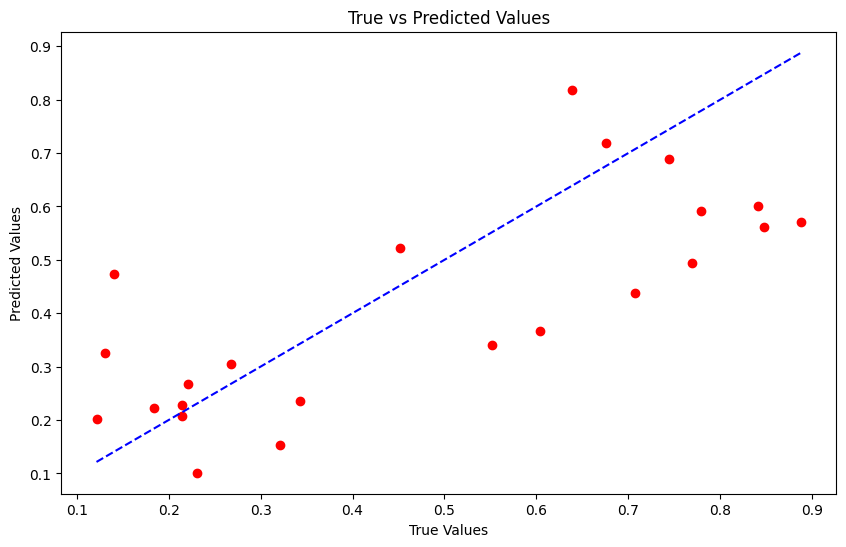

  0%|          | 0/23 [00:00<?, ?it/s]

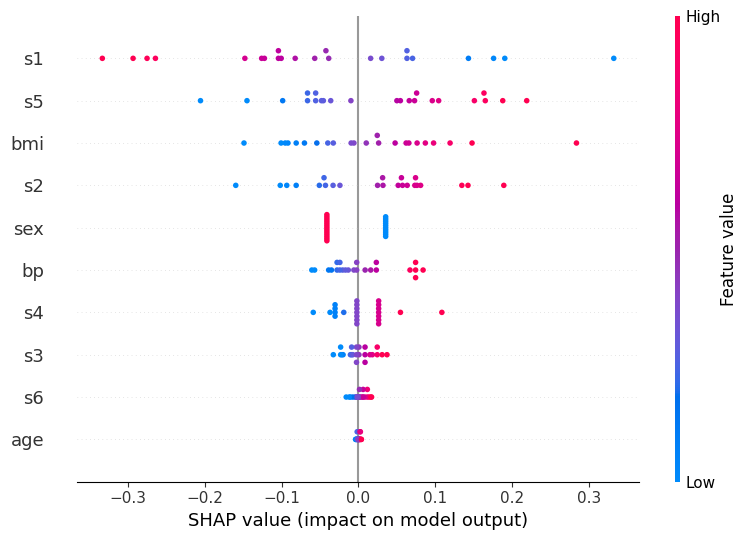

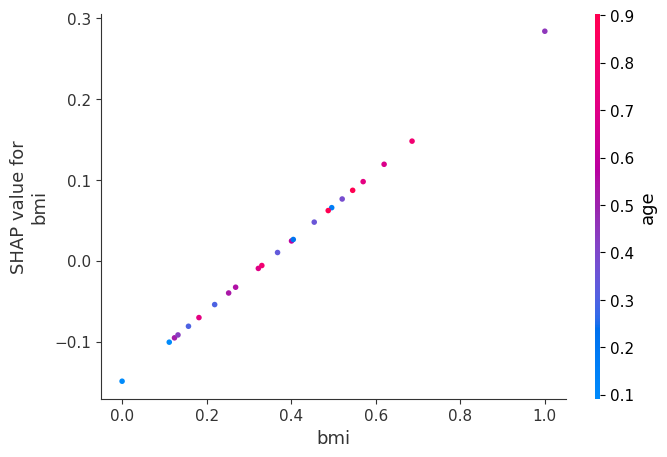

╒═════════════════════════╤═══════════╤═══════════╕
│ Metric                  │      Test │     Train │
╞═════════════════════════╪═══════════╪═══════════╡
│ Mean Squared Error      │ 0.0341234 │ 0.0274766 │
├─────────────────────────┼───────────┼───────────┤
│ Mean Absolute Error     │ 0.153515  │ 0.133844  │
├─────────────────────────┼───────────┼───────────┤
│ Root Mean Squared Error │ 0.184725  │ 0.165761  │
├─────────────────────────┼───────────┼───────────┤
│ R2 Score                │ 0.516379  │ 0.513588  │
╘═════════════════════════╧═══════════╧═══════════╛


In [23]:
y_pred_test_linear = linear.predict(x_test)
y_pred_train_linear = linear.predict(x_train)
linear.evaluate_all(y_test, y_pred_test_linear, y_train, y_pred_train_linear)

#### Random Forest Regression Model


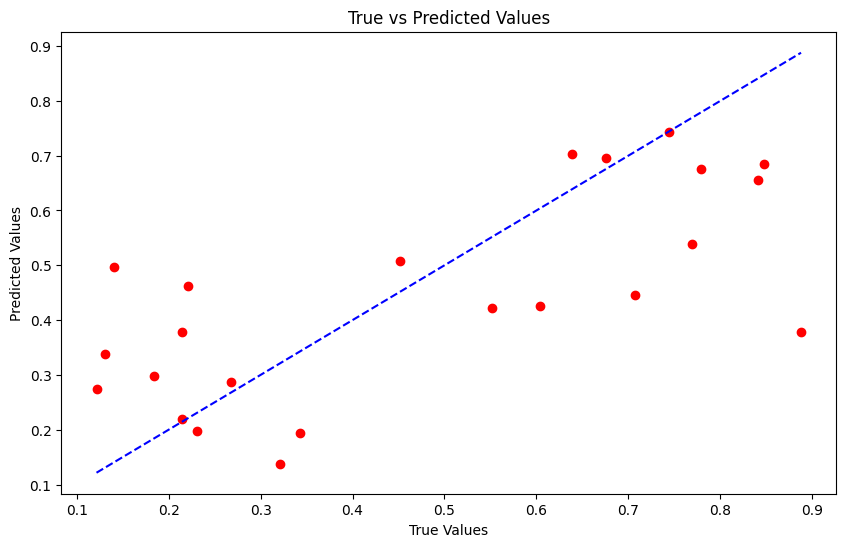

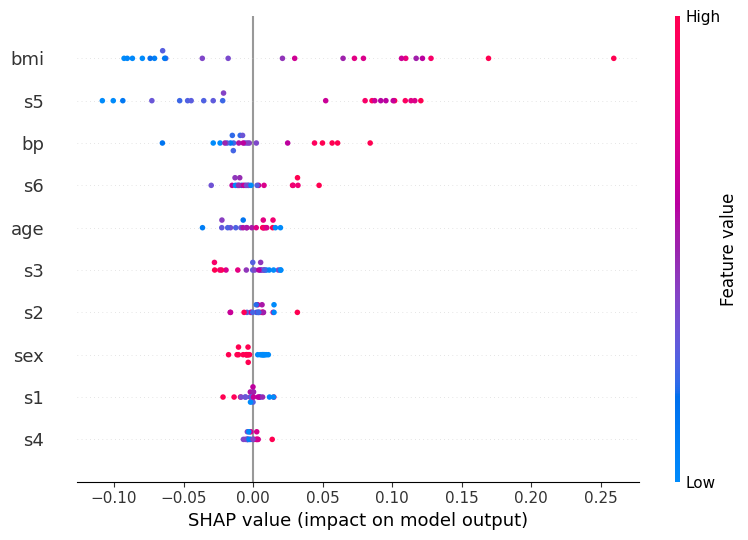

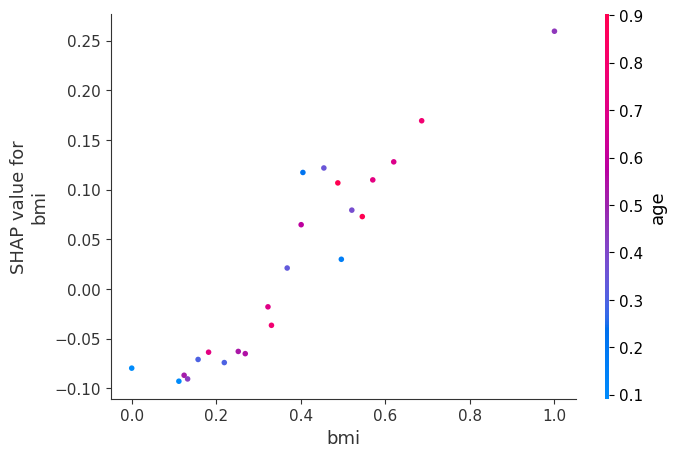

╒═════════════════════════╤═══════════╤════════════╕
│ Metric                  │      Test │      Train │
╞═════════════════════════╪═══════════╪════════════╡
│ Mean Squared Error      │ 0.0372516 │ 0.00441932 │
├─────────────────────────┼───────────┼────────────┤
│ Mean Absolute Error     │ 0.153222  │ 0.0538295  │
├─────────────────────────┼───────────┼────────────┤
│ Root Mean Squared Error │ 0.193007  │ 0.0664779  │
├─────────────────────────┼───────────┼────────────┤
│ R2 Score                │ 0.472044  │ 0.921766   │
╘═════════════════════════╧═══════════╧════════════╛


In [24]:
y_pred_test_random_forest = random_forest.predict(x_test)
y_pred_train_random_forest = random_forest.predict(x_train)
random_forest.evaluate_all(y_test, y_pred_test_random_forest, y_train, y_pred_train_random_forest)

#### Neural Network Regression Model


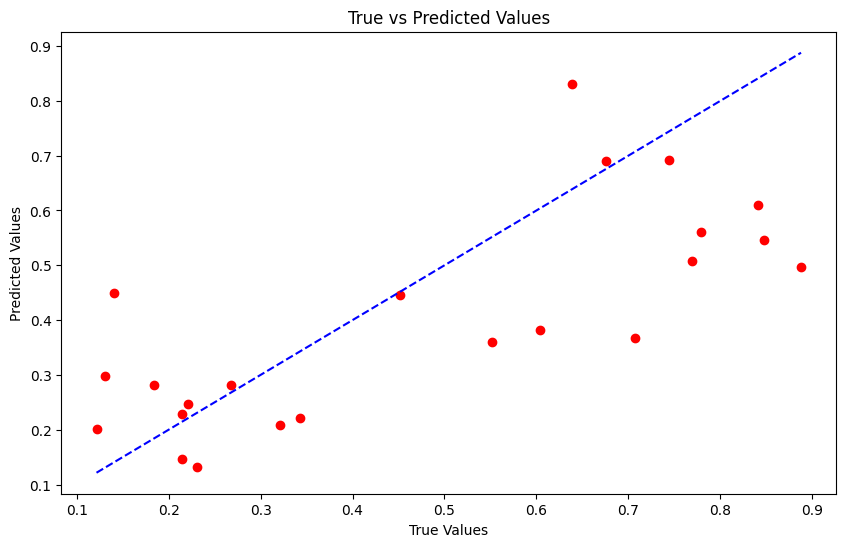

  0%|          | 0/23 [00:00<?, ?it/s]

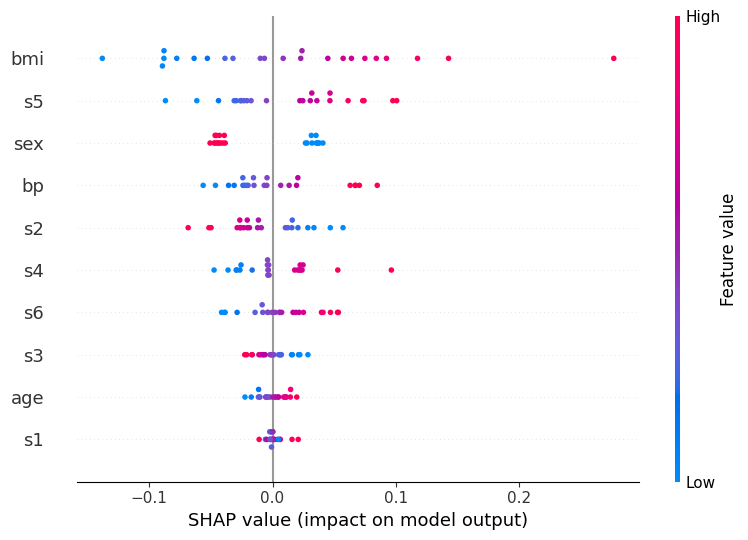

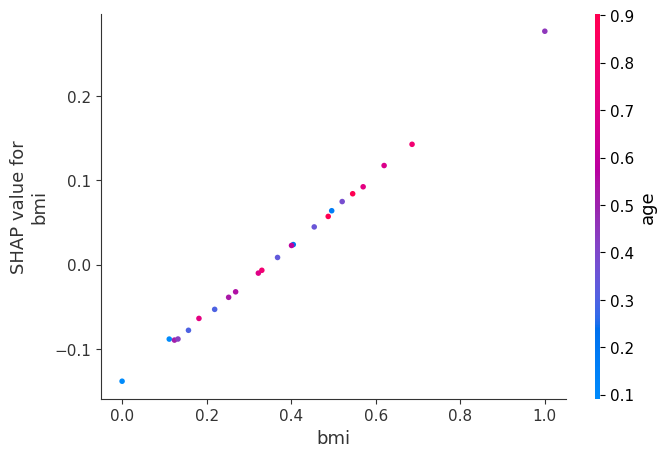

╒═════════════════════════╤═══════════╤═══════════╕
│ Metric                  │      Test │     Train │
╞═════════════════════════╪═══════════╪═══════════╡
│ Mean Squared Error      │ 0.0363928 │ 0.0280959 │
├─────────────────────────┼───────────┼───────────┤
│ Mean Absolute Error     │ 0.153447  │ 0.136061  │
├─────────────────────────┼───────────┼───────────┤
│ Root Mean Squared Error │ 0.190769  │ 0.167618  │
├─────────────────────────┼───────────┼───────────┤
│ R2 Score                │ 0.484215  │ 0.502625  │
╘═════════════════════════╧═══════════╧═══════════╛


In [25]:
y_pred_test_neural_network = neural_network.predict(x_test)
y_pred_train_neural_network = neural_network.predict(x_train)
neural_network.evaluate_all(y_test, y_pred_test_neural_network, y_train, y_pred_train_neural_network)

### Part 4. Ordinary Least Squares

Finally, we'll use OLS from the [scipy](https://docs.scipy.org) library, train the model, and display the statistics obtained from this process.

OLS is a method for estimating the unknown parameters in a linear regression model. It minimizes the sum of the squared differences between the observed values and the values predicted by the linear approximation. The formula for OLS is given by:

$$ \hat{\beta} = (X^T X)^{-1} X^T y $$

where $\hat{\beta}$ is the estimated coefficient vector, $X$ is the feature matrix, and $y$ is the target vector.


In [26]:
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           3.83e-62
Time:                        23:20:56   Log-Likelihood:                 164.98
No. Observations:                 442   AIC:                            -308.0
Df Residuals:                     431   BIC:                            -263.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0843      0.097     -0.866      0.3

Let's also visualize the relationships and the correlation between the features.

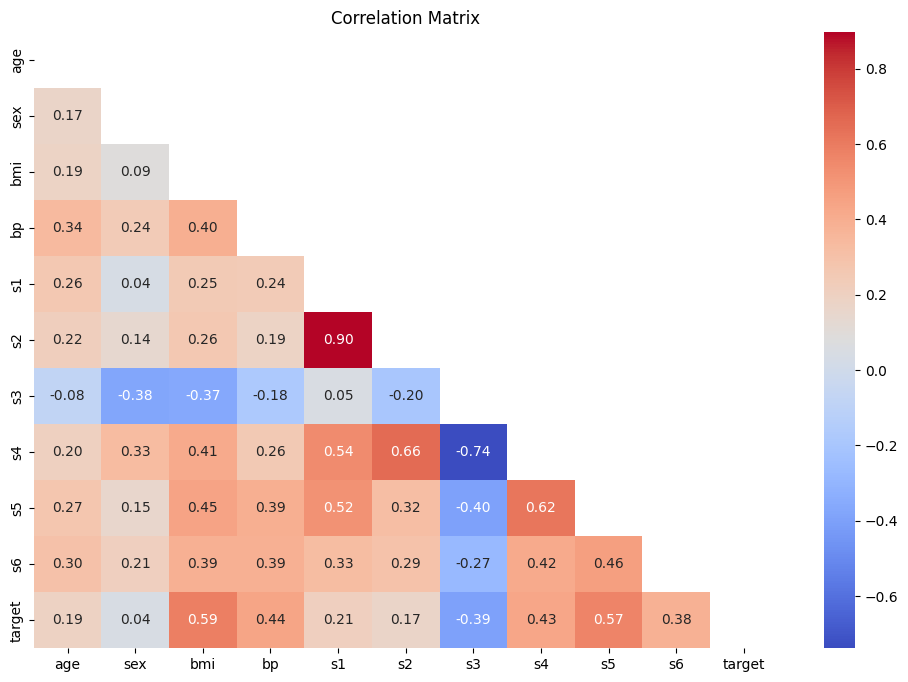

In [27]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

We can also fit the model with the train data and then predict the test data to evaluate the model.

In [29]:
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     43.08
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           7.57e-58
Time:                        23:23:07   Log-Likelihood:                 158.50
No. Observations:                 419   AIC:                            -295.0
Df Residuals:                     408   BIC:                            -250.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0902      0.099     -0.914      0.3

As we can see, the R² score is approximately 0.51, indicating that the model explains 51% of the variance in the target variable in the training dataset.

In [33]:
y_pred_test_ols = results.predict(sm.add_constant(x_test))
y_pred_train_ols = results.predict(x_train)

scores = {
    "Mean Squared Error": (mse(y_test, y_pred_test_ols), mse(y_train, y_pred_train_ols)),
    "Mean Absolute Error": (mae(y_test, y_pred_test_ols), mae(y_train, y_pred_train_ols)),
    "Root Mean Squared Error": (rmse(y_test, y_pred_test_ols), rmse(y_train, y_pred_train_ols)),
    "R2 Score": (r2_score(y_test, y_pred_test_ols), r2_score(y_train, y_pred_train_ols))
}

scores_list = [[key, value[0], value[1]] for key, value in scores.items()]
print(tabulate(scores_list, headers=["Metric", "Test", "Train"], tablefmt="fancy_grid"))

╒═════════════════════════╤═══════════╤═══════════╕
│ Metric                  │      Test │     Train │
╞═════════════════════════╪═══════════╪═══════════╡
│ Mean Squared Error      │ 0.0341234 │ 0.0274766 │
├─────────────────────────┼───────────┼───────────┤
│ Mean Absolute Error     │ 0.153515  │ 0.133844  │
├─────────────────────────┼───────────┼───────────┤
│ Root Mean Squared Error │ 0.184725  │ 0.165761  │
├─────────────────────────┼───────────┼───────────┤
│ R2 Score                │ 0.516379  │ 0.513588  │
╘═════════════════════════╧═══════════╧═══════════╛


As we can see in the above table, the R² score for both the training and testing datasets is approximately 0.51, indicating that the model explains 51% of the variance in the target variable for both datasets and is consistent across them which means the model is not overfitting.

## Questions

1. **Analyze and evaluate the values in Table (1).**

    The values for the 'Linear Regression Model' are as follows:

    | Data Type/Optimizer |   MSE    |   MAE    |   RMSE   | R² Score |
    |---------------------|----------|----------|----------|----------|
    | Train Set           | 0.274766 | 0.133844 | 0.165761 | 0.513588 |
    | Test Set            | 0.341234 | 0.153515 | 0.184725 | 0.516379 |


    <br>

    - The MSE for the training set is lower than that of the test set, which suggests that the model might be slightly overfitting to the training data.
    - Similar to MSE, the MAE for the training set is lower than that of the test set, indicating potential overfitting.
    - Like MSE and MAE, the RMSE for the training set is lower than that of the test set, indicating potential overfitting.
    - The R² score for both the training and test sets is similar, suggesting that the model is performing similarly on both datasets.

    As we can see, the R-squared (R²) values for both the training and testing sets are around 0.51, indicating that the linear regression model explains approximately 51% of the variance in the target variable. This score is almost the same as OLS, which is 0.518. However, in the 'Random Forest Regression Model', the R² score for the training set is 0.92, while for the testing set, it is 0.46. This discrepancy suggests that the model may be overfitting the training data and not generalizing well to unseen data. The 'Neural Network Regression Model' has an R² score of 0.51 for the training set and 0.53 for the testing set, which is similar to the linear regression model. This indicates that the neural network model performs similarly to the linear regression model in terms of explaining the variance in the target variable.

2. **Review the R² and Adjusted R² values obtained in part 4. Explain what these values indicate and what the implications of high or low values might be. Also, discuss the differences between these two metrics.**

    R² (R-squared) is a way to measure how much the independent variables in a regression model explain the variability in the dependent variable. In simpler terms, it indicates the goodness-of-fit of the regression model. It goes from 0 to 1, where 1 means the model fits perfectly. An R-squared of 0.518 means that approximately 51.8% of the variance in the dependent variable is explained by the independent variables in the model.

    Adjusted R² is like R² but it considers how many predictors are in the model. It penalizes the addition of irrelevant predictores. In other words, it penalizes adding useless predictors. The adjusted R-squared of 0.507 indicates that after adjusting for the number of predictors, approximately 50.7% of the variance in the dependent variable is explained by the independent variables in the model.

    The formula to compute Adjusted R-squared is given by:

    $$ R_{adj}^2 = 1 - \frac{{(1 - R^2)(n - 1)}}{{n - k - 1}} $$


    A high R² means the model explains a lot of the variation in the dependent variable, while a low R² means it doesn't explain much.

    A high Adjusted R² means the model is good and the predictors matter, while a low one suggests the model might have too many useless predictors.

    The difference between R² and Adjusted R² is that R² can go up even if we add more predictors that don't help much, while Adjusted R² doesn't like adding useless predictors. Adjusted R² is better when comparing models with different numbers of predictors.

3. **Review the p-values obtained in part 4 for each column of data and explain what these values indicate. Discuss what an appropriate value for p-values is and which columns currently have suitable values.**

    The p-value helps us determine the significance of predictors in a regression model by assessing the likelihood of observing the data under the assumption that the predictor has no effect on the outcome variable (this assumption is called the null hypothesis).

    A low p-value (usually less than 0.05) suggests that we have enough evidence to reject the null hypothesis, indicating that the predictor is statistically significant and has a substantial impact on the outcome variable. Conversely, a high p-value indicates that we fail to reject the null hypothesis, suggesting that the predictor is not statistically significant and should be removed from the model.

    Typically, a p-value less than 0.05 is considered appropriate, implying a 95% confidence level in rejecting the null hypothesis and concluding that the predictor is significant. Predictors with p-values below 0.05 are deemed statistically significant and are likely to influence the outcome variable, while predictors with p-values above 0.05 are considered not statistically significant and are often removed from the model.

    As we can see, the p-value for the following columns is less than 0.05, indicating that they are statistically significant and they have a significant effect on the dependent variables:

    - sex
    - bmi
    - Blood Pressure(bp)
    - s1
    - s5

4. **Assess and analyze the importance of each feature in the dataset based on the results obtained in part 4 regarding an individual's diabetic condition.**

    In assessing the importance of each feature in predicting an individual's diabetic condition based on the provided Ordinary Least Squares (OLS) regression results, several factors need to be considered:

    - Coefficient Magnitude (coef): <br>The coefficient magnitude indicates the strength and direction of the relationship between each feature and the target variable (diabetic condition). It represent the change in the dependent variable (diabetic condition) for a one-unit change in the corresponding independent variable (feature), holding all other variables constant. Features with larger absolute coefficients have a stronger influence on the target variable.

    - Statistical Significance (P>|t|): <br>The p-value associated with each feature's coefficient determines its statistical significance. Lower p-values indicate more significant relationships between the feature and the target variable (diabetic condition).

    Features with higher absolute coefficient values and lower p-values are generally considered more important in predicting the diabetic condition. A higher absolute coefficient value suggests a larger impact on the diabetic condition, while a lower p-value indicates greater confidence in the significance of the relationship.

    However, some features may have large coefficients but high p-values. This could be due to multicollinearity with other features or a lack of statistical significance. In such cases, further analysis, such as feature selection or regularization techniques, may be necessary to improve the model's predictive performance. For example, the feature `s2` has a relatively high coefficient but a high p-value, which is because of the high correlation with the feature `s1`.

    As mentioned in the previous question, the features `sex`, `bmi`, `bp`, `s1` and `s5` have p-values less than 0.05, indicating that they are statistically significant predictors of the diabetic condition. These features are likely to play a crucial role in predicting an individual's diabetic condition based on the OLS regression model results. Also, the features `bmi`, `bp`, `s1`, `s2`, `s3`, `s4`, and `s5` have relatively higher coefficients, suggesting they have a more substantial impact on the diabetic condition compared to other features.


## References

-   [Scikit-learn: Diabetes Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)
-   [Diabetes Dataset](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)
-   [Regression on Diabetes Dataset](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Diabetes%20regression.html)
-   [OLS using statsmodels](https://www.geeksforgeeks.org/ordinary-least-squares-ols-using-statsmodels/)
